In [1]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from matplotlib import colors as color
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [10]:
def newtonseq(x0, k, stepsize) : 

    def fentonfgH(x_eval) :
        x1, x2 = sm.symbols('x1 x2')
        class func(sm.Function):
            @classmethod
            def eval(cls, x1, x2):
                # Define the behavior of your function here
                res = (1/10) * (12 + x1**2 + (1 + x2**2)/x1**2 + (x1**2 * x2**2 + 100) / (x1**4 * x2**4) )
                return res
            
        # gradient and hessian are recalculated every single time. 
        # drops performance significantly
        # dont worry about it I guess
        f = func(x1, x2)
        g = [sm.diff(f, k) for k in [x1, x2]]
        H = sm.hessian(f, (x1, x2))
        
        f = f.subs([(x1, x_eval[0]), (x2, x_eval[1])]) 
        g = [g[i].subs([(x1, x_eval[0]), (x2, x_eval[1])]) for i in range(len(g))] 
        H = H.subs([(x1, x_eval[0]), (x2, x_eval[1])])

        return np.array(f).astype(np.float64), np.array(g).astype(np.float64), np.array(H).astype(np.float64)

    newtonseq = np.zeros((k, 2))
    newtonseq[0, :] = x0

    for i in range(0, k - 1):
        _, g, H = fentonfgH(newtonseq[i, :])

        newtonseq[i+1, :] = newtonseq[i, :] - stepsize * (np.linalg.inv(H) @ g).T
    
    return newtonseq



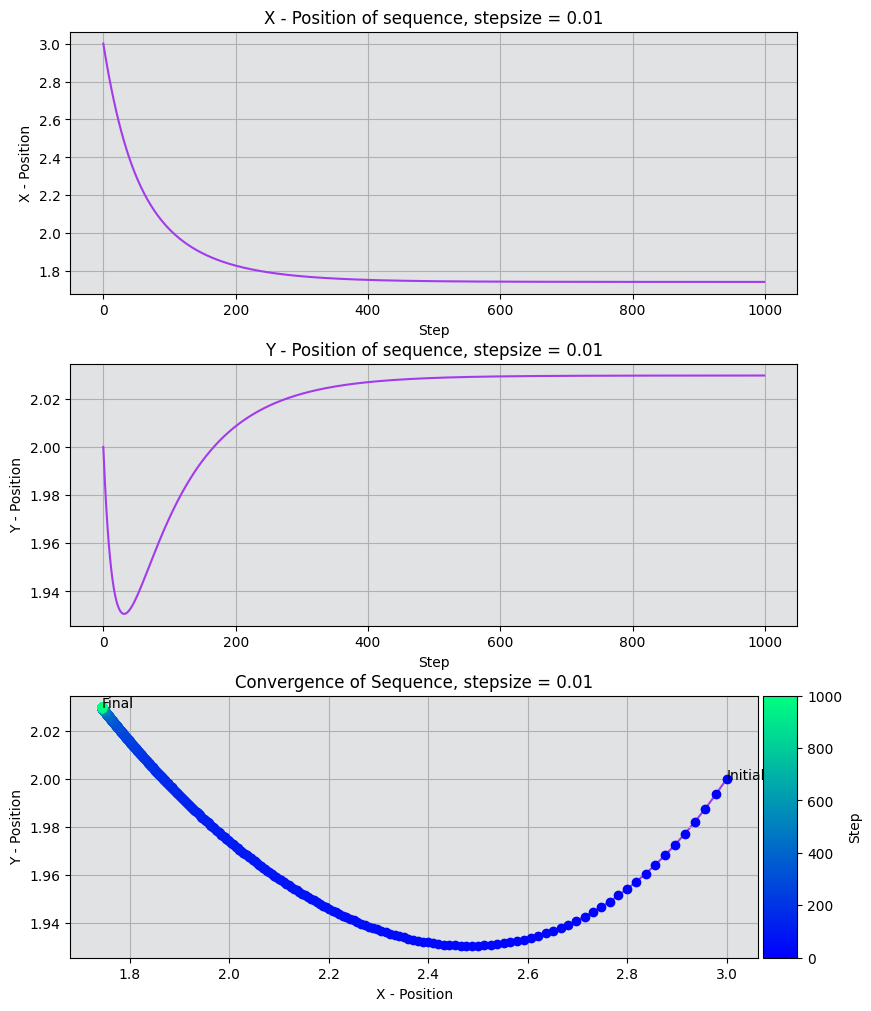

In [15]:
stepsize = 0.01
xk = newtonseq([3, 2], 1000, stepsize)
fig, axs = plt.subplots(3, 1, figsize = (8, 10))

#I wanted a color gradient that goes between two dark colors.
#winter was the only one I could find.
cm = matplotlib.colormaps['winter']
norm = color.Normalize(vmin=0, vmax=len(xk[:, 1]))

titles = ['X', 'Y']
for i in [0, 1, 2]:
    if i != 2:        
        axs[i].plot(xk[:, i], c = "#A23BEC")
        axs[i].set_xlabel("Step")
        axs[i].set_ylabel(f'{titles[i]} - Position')
        axs[i].set_title(f'{titles[i]} - Position of sequence, stepsize = {stepsize}')
    else :
        
        for j in range(len(xk[:, 0])):
            axs[i].scatter(xk[j, 0], xk[j, 1], c=[cm(norm(j))], zorder = 2)
        axs[i].plot(xk[:, 0], xk[:, 1], c="#A23BEC", linewidth=1.5, zorder = 1)
        axs[i].set_title(f'Convergence of Sequence, stepsize = {stepsize}')
        axs[i].set_xlabel("X - Position")
        axs[i].set_ylabel("Y - Position")
        axs[i].annotate('Initial', xy = (xk[0, 0], xk[0, 1]))
        axs[i].annotate('Final', xy = (xk[-1, 0], xk[-1, 1]))

    axs[i].set_facecolor("#e1e2e3")
    axs[i].grid(True)


divider = make_axes_locatable(axs[-1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.tight_layout(pad = 0.3)
fig.colorbar(plt.cm.ScalarMappable(norm = norm, cmap = cm), ax = axs[-1], label = 'Step', cax=cax)

